In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/EntangledAir/

/content/drive/.shortcut-targets-by-id/1PbEtY2U2HxVCIwqpPW61cvt2srgUgaNk/EntangledAir


In [3]:
!ls

allData.csv  Visualization_composed.ipynb  vizualization


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from tqdm import tqdm
import os
import glob
import datetime
import calendar

from matplotlib.pyplot import figure
figure(figsize=(17, 10), dpi=300)

plt.rcParams['figure.figsize'] = (17, 10)

plt.rcParams["font.family"] = "Times New Roman"
mpl.rcParams['figure.dpi'] = 300
font = {'family' : "Times New Roman",
        'weight' : 'normal',
        'size'   : 28}

mpl.rc('font', **font)
mpl.rcParams["figure.dpi"] = 300


<Figure size 5100x3000 with 0 Axes>

In [5]:
def celcius(fahrenheit):
    return(fahrenheit - 32)/1.8


def read_csv(csv):
    df=pd.DataFrame()
    df = pd.read_csv(csv)
    df=df.drop(['mac_address', 'firmware_ver', 'hardware'],axis=1)


    year=[]
    month=[]
    date=[]
    time=[]
    hour=[]
    minute=[]
    second=[]
    calender=[]

    for i in df['UTCDateTime']:
        year.append(i.split("T")[0].split('/')[0])
        month.append(i.split("T")[0].split('/')[1])
        date.append(i.split("T")[0].split('/')[2])
        time.append(i.split('T')[1].split('z')[0])
        hour.append(i.split('T')[1].split('z')[0].split(':')[0])
        minute.append(i.split('T')[1].split('z')[0].split(':')[1])
        second.append(i.split('T')[1].split('z')[0].split(':')[2])
    df.insert(1,"Year",year)
    df.insert(2,"Month",month)
    df.insert(3,"Date",date)
    df.insert(4,"Time",time)
    df.insert(5,"Hour",hour)
    df.insert(6,"Minute",minute)
    df.insert(7,"Second",second)
    
    for i,j,k in zip(month, date, year):
        calender.append(findDay(str(i)+'-'+str(j)+'-'+str(k)))
        
    df.insert(8,"Day",calender)

#     df=df.drop(['UTCDateTime'],axis=1)
    
    return df




def update_data(input):
    data=pd.read_csv(input)
    path = "./"
    all_files = glob.glob(os.path.join(path, "*.csv"))

    existing_files=np.array(data['FileName'])
    newFiles = [i for i in all_files if i not in np.append(existing_files,'.\\'+input)]

    newFrame=data

    for file in tqdm(newFiles):
#         print("processing file: "+file)
        try:
            df=read_csv(file)
            df.insert(len(df.columns),"FileName",file)
            newFrame=pd.concat([newFrame,df]).drop_duplicates()
        except:
            print("There is a problem with this file: "+file)
    newFrame.to_csv(input, index=False)    
    return data



def import_data():
    path = "./"
    all_files = glob.glob(os.path.join(path, "*.csv")) #make list of paths
    allData=pd.DataFrame()
    for file in tqdm(all_files):
    #     print("processing file: "+file)
        try:
            df=read_csv(file)
            df.insert(len(df.columns),"FileName",file)
            allData=pd.concat([allData,df]).drop_duplicates()
        except:
            print("There is a problem with this file: "+file)
    allData.to_csv('allData.csv', index=False)    
    return allData

def findDay(date):
    born = datetime.datetime.strptime(date, '%m-%d-%Y').weekday()
    return (calendar.day_name[born])
 


In [6]:
# process all file and saves in a single dataframe
# run only the first time

# allData=import_data()

# run this to update new files 
data_updated=update_data('allData.csv')




# the following will trim the data to the required fields

data=pd.read_csv('allData.csv',parse_dates=["UTCDateTime"])
data["UTCDateTime"] = pd.to_datetime(data["UTCDateTime"])
data=data[data.columns.drop(list(data.filter(regex='_b')))]
data=data[data.columns.drop(list(data.filter(regex='gas')))]
data=data[data.columns.drop(list(data.filter(regex='_cf_1')))]
data=data[['UTCDateTime','Year', 'Month', 'Date', 'Time', 'Hour', 'Minute', 'Second', 'Day',
       'current_temp_f', 'current_humidity', 'pm1_0_atm', 'pm2_5_atm', 'pm10_0_atm',
       'pm2.5_aqi_atm', 'p_0_3_um', 'p_0_5_um', 'p_1_0_um', 'p_2_5_um',
       'p_5_0_um', 'p_10_0_um', 'FileName']].dropna()

c=[]
a=np.array(data['current_temp_f'])
for i in a:
    c.append(float(i))
data['current_temp_f']=c

<ipython-input-6-4ea328484f1d>:7: DtypeWarning: Columns (9,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  data_updated=update_data('allData.csv')
  0%|          | 0/1 [00:00<?, ?it/s]<ipython-input-5-8d231cc4c98b>:61: DtypeWarning: Columns (9,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  df=read_csv(file)
100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


There is a problem with this file: ./allData.csv


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
data=data[(data["Minute"]>1) & (data['pm2.5_aqi_atm']<150)]
# data=data[(data["Minute"]>1)]

In [8]:
variables=['current_temp_f', 'current_humidity', 'pm1_0_atm', 'pm2_5_atm',
       'pm10_0_atm', 'pm2.5_aqi_atm', 'p_0_3_um', 'p_0_5_um', 'p_1_0_um',
       'p_2_5_um', 'p_5_0_um', 'p_10_0_um']
labels=['Temperature (°F)','Relative humidity', 'PM1 Concentration (μg/m$^3$)', 'PM2.5 Concentration (μg/m$^3$)',
       'PM10 Concentration (μg/m$^3$)', 'Air quality index (AQI)', 'Number concentration of PM0.3 (#/dl)', 
        'Number concentration of PM0.5 (#/dl)', 'Number concentration of PM1 (#/dl)', 
        'Number concentration of PM2.5 (#/dl)','Number concentration of PM5 (#/dl)', 
        'Number concentration of PM10 (#/dl)']
filename=['Temperature','RelativeHumidity', 'PM1_Concentration', 'PM2_5_Concentration',
       'PM10_Concentration', 'AQI', 'Number_concentration_PM0_3', 
        'Number_concentration_PM0_5', 'Number_concentration_PM1', 
        'Number_concentration_PM2_5','Number_concentration_PM5', 
        'Number_concentration_PM10']

In [9]:
data_2022=data[(data['Year']==2022)   ][['UTCDateTime','Month', 'Date',
       'current_temp_f', 'current_humidity', 'pm1_0_atm', 'pm2_5_atm',
       'pm10_0_atm', 'pm2.5_aqi_atm', 'p_0_3_um', 'p_0_5_um', 'p_1_0_um',
       'p_2_5_um', 'p_5_0_um', 'p_10_0_um', 'FileName']].dropna()


# data_2022=data[(data['Year']==2022)   ][['UTCDateTime','Month', 'Date',
#        'current_temp_f', 'current_humidity', 'pm1_0_atm', 'pm2_5_atm',
#        'pm10_0_atm', 'pm2.5_aqi_atm', 'p_0_3_um', 'p_0_5_um', 'p_1_0_um',
#        'p_2_5_um', 'p_5_0_um', 'p_10_0_um', 'FileName']].dropna()






test2=pd.DataFrame()
test2=data_2022.copy()
test2['UTCDateTime']=test2['UTCDateTime'].dt.year
test2=test2.set_index('UTCDateTime')
test2=test2.groupby('UTCDateTime').agg(['mean','min','max'])
color='k'
colorl='b'

test2['pm2_5_atm']

,mean,min,max
UTCDateTime,,,
2022,10.297615,0.0,55.18


In [10]:
from matplotlib.pyplot import figure
figure(figsize=(17, 10), dpi=300)




plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']


plt.rcParams['figure.figsize'] = (17, 10)


mpl.rcParams['figure.dpi'] = 300
font = {'weight' : 'normal',
        'size'   : 28}

mpl.rc('font', **font)
mpl.rcParams["figure.dpi"] = 300

<Figure size 5100x3000 with 0 Axes>

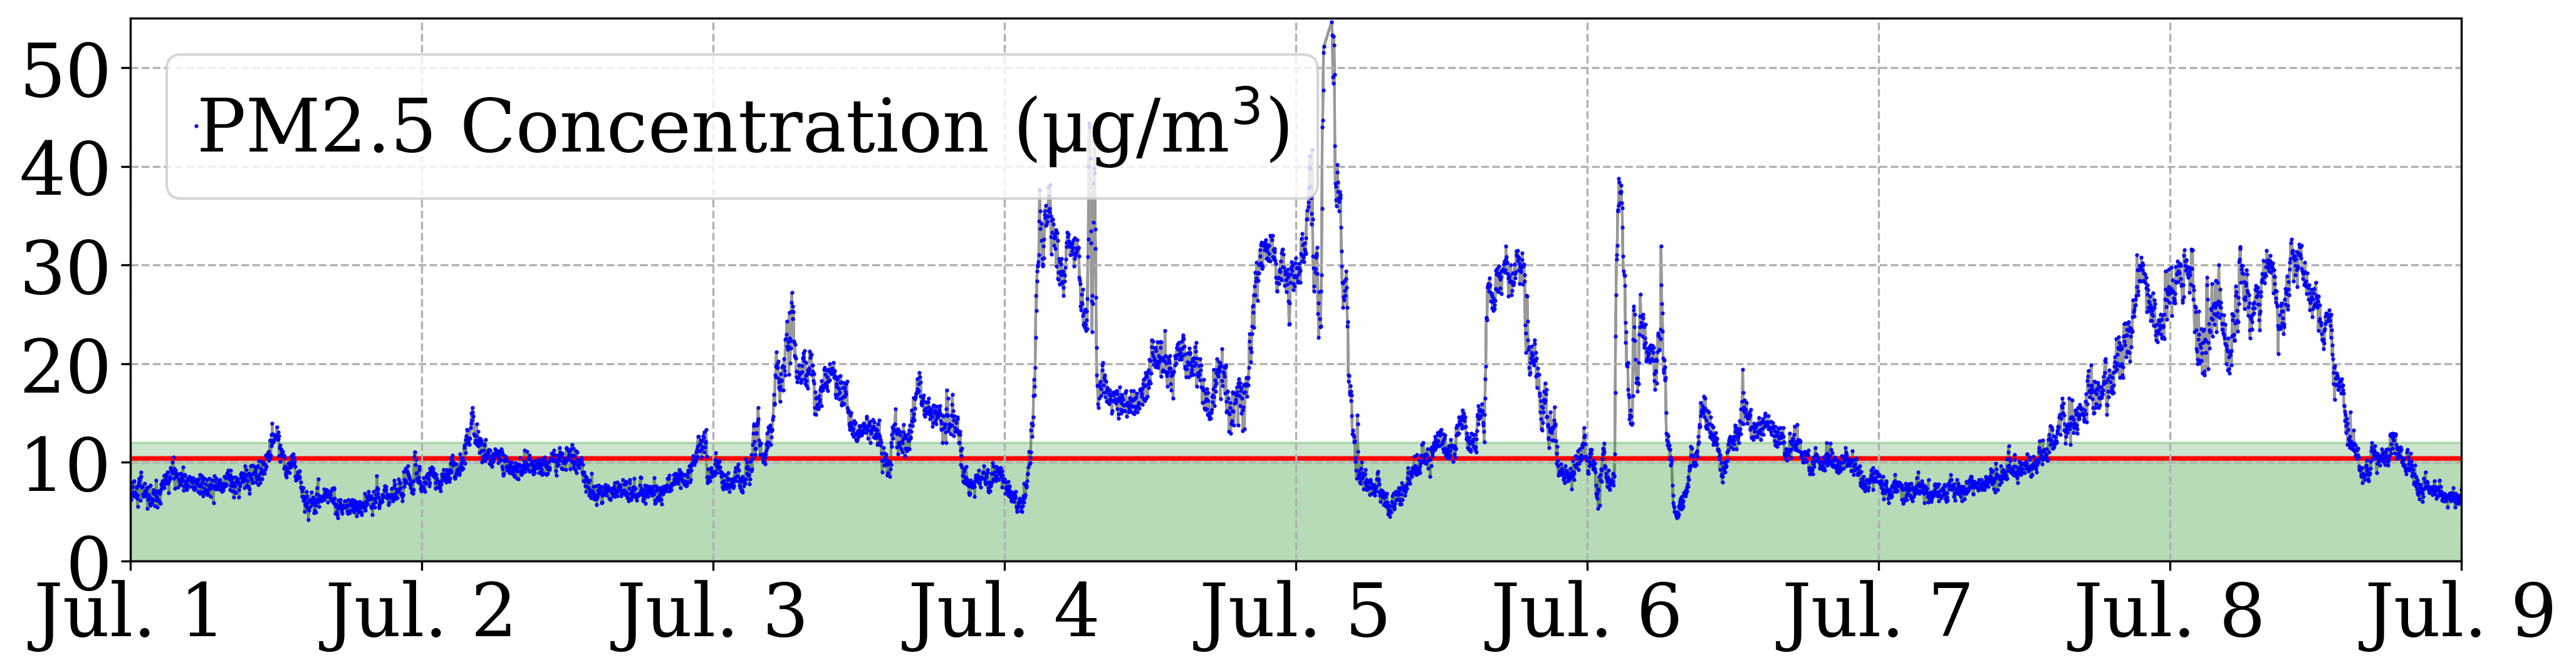

In [11]:


mpl.rc('font', **font)
mpl.rcParams["figure.dpi"] = 300

variables=['current_temp_f',  'pm2_5_atm', 'pm2.5_aqi_atm','p_2_5_um']
labels=['Temperature (°F)', 'PM2.5 Concentration (μg/m$^3$)','Air quality index (AQI)','Number concentration of PM2.5 (#/dl)']
filename=['Temperature', 'PM2_5_Concentration', 'AQI', 'Number_concentration_PM2_5']

j=variables[1]

mon='Jul'
m=7
d1=1
d2=9
dt=9

data_2022=data[(data['Year']==2022) & (data['Month']==m) & (data['Date']>=d1) & (data['Date']<=d2)][['UTCDateTime','Month', 'Date',
       'current_temp_f', 'current_humidity', 'pm1_0_atm', 'pm2_5_atm',
       'pm10_0_atm', 'pm2.5_aqi_atm', 'p_0_3_um', 'p_0_5_um', 'p_1_0_um',
       'p_2_5_um', 'p_5_0_um', 'p_10_0_um', 'FileName']].dropna()


test2=pd.DataFrame()
test2=data_2022.copy()
# test2['UTCDateTime']=test2['UTCDateTime'].dt.hour

test2=test2.set_index('UTCDateTime')
# test2.tz_convert('US/Central')
test2=test2.groupby('UTCDateTime').agg(['mean','min','max'])
color='k'
colorl='b'
# data_2022=data[(data['Year']==2022)   ][['UTCDateTime','Month', 'Date',
#        'current_temp_f', 'current_humidity', 'pm1_0_atm', 'pm2_5_atm',
#        'pm10_0_atm', 'pm2.5_aqi_atm', 'p_0_3_um', 'p_0_5_um', 'p_1_0_um',
#        'p_2_5_um', 'p_5_0_um', 'p_10_0_um', 'FileName']].dropna()







plt.figure(figsize=(16,4.25),dpi=300)

# # Create two subplots and unpack the output array immediately
# f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# ax1.plot(x, y)
# ax1.set_title('Sharing Y axis')
# ax2.scatter(x, y)

ax=test2[j]['mean'].plot(marker='.',linestyle='None',lw='2',c=colorl,markersize='1',label=labels[variables.index(j)])

# ax.fill_between(test2.index,0,50,color='g',alpha=0.3)
# ax.fill_between(test2.index,50,100,color='y',alpha=0.3)
# ax.fill_between(test2.index,100,150,color='orange',alpha=0.3)

ax.fill_between(test2.index,test2[j]['min'],test2[j]['max'],color=color,alpha=0.4,edgecolor=color)

ax.fill_between(test2.index,12,0,color='g',alpha=0.2)
ax.fill_between(test2.index,10,0,color='g',alpha=0.1)
ax.fill_between(test2.index,10.297615,10.5,color='r',alpha=1, edgecolor='r',facecolor='r')


#     plt.xlabel('Month')
plt.xlabel(None)
plt.ylabel(None)
# ax.set_xticklabels([])

# plt.title(labels[variables.index(j)])

# tickposition=[]
plt.ylim(ymax=55,ymin=0)
ticks=np.linspace(0,50,6)
plt.yticks(ticks)

# plt.yticks(ticks=[0,10,20,30])
plt.grid(visible=True,which='both',linestyle='--')
# plt.legend([labels[variables.index(j)]],loc='best')
legend = plt.legend(handletextpad=0.0, handlelength=0,loc='best')


tickposition=[]

for i in range(dt):
    tickposition.append('2022-'+str(m)+'-'+str(d1+i*np.ceil((d2-d1)/dt)).split('.')[0])
plt.xticks(ticks=tickposition)
# ax.set_xticklabels(['January','February','March','April','May','June','July','August','September','October', 'November', 'December'],rotation = 30)
ticklabel=[]
for i in tickposition:
    try:
        ticklabel.append(mon+". "+ i.split('-')[2])
    except:
        print('out of range')
ax.set_xticklabels(ticklabel)
plt.xticks(horizontalalignment='center',rotation=0)
plt.xlim(xmin=tickposition[0],xmax=tickposition[-1])
   
    
plt.savefig('./vizualization/final/'+mon+'_'+filename[variables.index(j)]+'.png', dpi=300,bbox_inches='tight')

In [12]:
def AMPM(dt,d1,m):
    dt=3
    dt=int((24/dt)+1)
    tickpositions=[]
    h=[]
    for i in range(24):
        if i%24 <10:
            h.append('0'+str(i))
        else:
            h.append(str(i))

    if d1<10:
        days='0'+str(d1)
    else:
        days=str(d1)
    for j in range(24):
        tickpositions.append('01-'+days+' '+ h[j])

    tickpositions.append('01-0'+str(m+1)+' 00')

    tickposition=[]

    for i in range(dt):
        a=i*int(np.ceil(24/dt))
        tickposition.append(tickpositions[a])

    ticklabel=[]

    for i in tickposition:
        if (int(i.split(' ')[1]) == 0):
            ticklabel.append('12:00 AM')
        elif (int(i.split(' ')[1]) < 12):
            ticklabel.append((i.split(' ')[1]) + ':00 AM')
        
        elif (int(i.split(' ')[1]) > 12):
            ticklabel.append( str(int(i.split(' ')[1])-12) + ':00 PM')
        else:
            ticklabel.append('12:00 PM')   
            
    return ticklabel

<Figure size 5100x3000 with 0 Axes>

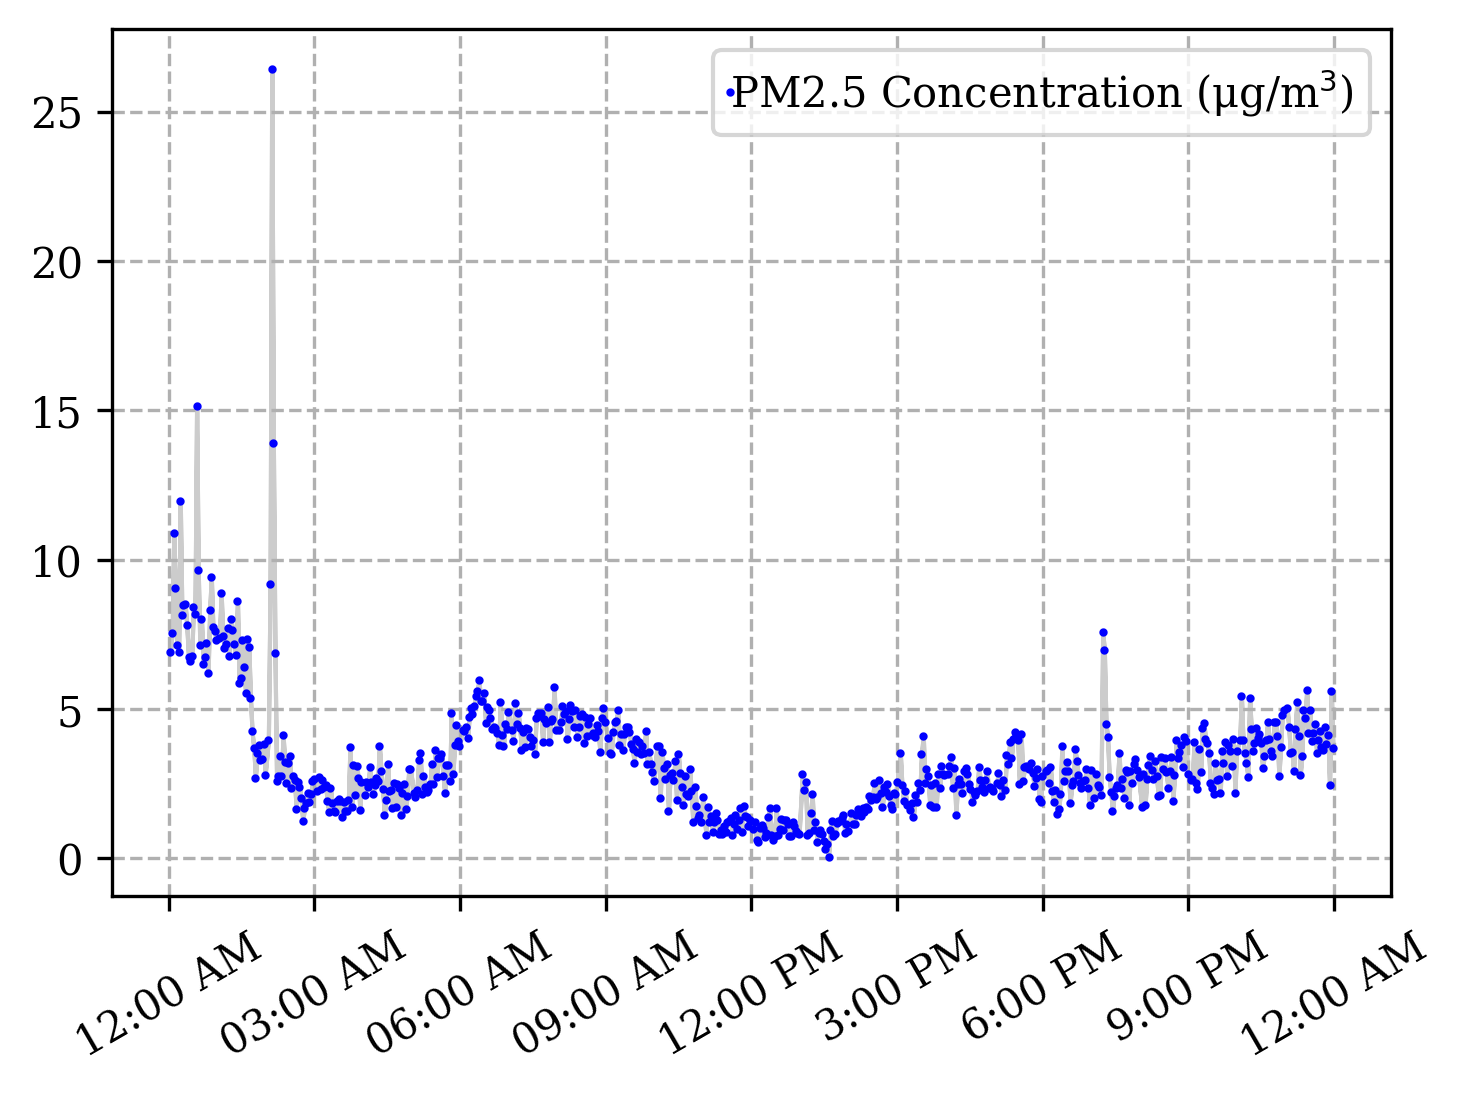

In [13]:
from matplotlib.pyplot import figure
figure(figsize=(17, 10), dpi=300)

plt.rcParams['figure.figsize'] = (17, 10)

mpl.rcParams['figure.dpi'] = 300
font = {'weight' : 'normal',
        'size'   : 10}

mpl.rc('font', **font)
mpl.rcParams["figure.dpi"] = 300

variables=['current_temp_f',  'pm2_5_atm', 'pm2.5_aqi_atm','p_2_5_um']
labels=['Temperature (°F)', 'PM2.5 Concentration (μg/m$^3$)','Air quality index (AQI)','Number concentration of PM2.5 ($\\frac{\#\;of\;PM2.5\;particles}{Litre}$)']
filename=['Temperature', 'PM2_5_Concentration', 'AQI', 'Number_concentration_PM2_5']

j=variables[1]
day= 'Fri'

d1=20
m=1
dt=3



data_2022=data[(data['Year']==2023) & (data['Month']==m) & (data['Date']>=d1) & (data['Date']<=d1)][['UTCDateTime','Month', 'Date',
       'current_temp_f', 'current_humidity', 'pm1_0_atm', 'pm2_5_atm',
       'pm10_0_atm', 'pm2.5_aqi_atm', 'p_0_3_um', 'p_0_5_um', 'p_1_0_um',
       'p_2_5_um', 'p_5_0_um', 'p_10_0_um', 'FileName']].dropna()


test2=pd.DataFrame()
test2=data_2022.copy()
test2['p_2_5_um']=10*test2['p_2_5_um']


test2=test2.set_index('UTCDateTime')
# test2.tz_convert('US/Central')
test2=test2.groupby('UTCDateTime').agg(['mean','min','max'])
color='k'
colorl='b'



plt.figure(figsize=(5.5,4.25),dpi=300)

ax=test2[j]['mean'].plot(marker='.',linestyle='None',lw='2',c=colorl,markersize='2',label=labels[variables.index(j)])
ax.fill_between(test2.index,test2[j]['min'],test2[j]['max'],color=color,alpha=0.2,edgecolor=color)
# ax.fill_between(test2.index,0,12,color='g',alpha=0.3)
# ax.fill_between(test2.index,10.297615,10.297615,color='r')

#     plt.xlabel('Month')
plt.xlabel(None)
plt.ylabel(None)

ax.set_xticklabels(AMPM(dt,d1,m))

# plt.title(labels[variables.index(j)])

# tickposition=[]
# ticks=np.linspace(0,50,6)
# plt.yticks(ticks)

# plt.yticks(ticks=[0,10,20,30])
plt.grid(visible=True,which='both',linestyle='--')
# plt.legend([labels[variables.index(j)]],loc='best')
legend = plt.legend(handletextpad=0.0, handlelength=0,loc='best')
plt.ylim(ymax=None)

plt.xticks(horizontalalignment="center",rotation=30)

plt.savefig('./vizualization/final/'+day+'_'+filename[variables.index(j)]+'.png', dpi=300,bbox_inches='tight')

In [14]:
def weeklyplots(d1,m,day,var,ym):
    from matplotlib.pyplot import figure
    figure(figsize=(17, 10), dpi=300)

    plt.rcParams['figure.figsize'] = (17, 10)

  
    mpl.rcParams['figure.dpi'] = 300
    font = {'weight' : 'normal',
            'size'   : 10}

    mpl.rc('font', **font)
    mpl.rcParams["figure.dpi"] = 300

    variables=['current_temp_f',  'pm2_5_atm', 'pm2.5_aqi_atm','p_2_5_um']
    labels=['Temperature (°F)', 'PM2.5 Concentration (μg/m$^3$)','Air quality index (AQI)','Number concentration of PM2.5 ($\\frac{\#\;of\;PM2.5\;particles}{Litre}$)']
    filename=['Temperature', 'PM2_5_Concentration', 'AQI', 'Number_concentration_PM2_5']

    j=variables[var]
#     day= 'Fri'
#     d1=20
#     m=1
    dt=3



    data_2022=data[(data['Year']==2023) & (data['Month']==m) & (data['Date']>=d1) & (data['Date']<=d1)][['UTCDateTime','Month', 'Date',
           'current_temp_f', 'current_humidity', 'pm1_0_atm', 'pm2_5_atm',
           'pm10_0_atm', 'pm2.5_aqi_atm', 'p_0_3_um', 'p_0_5_um', 'p_1_0_um',
           'p_2_5_um', 'p_5_0_um', 'p_10_0_um', 'FileName']].dropna()


    test2=pd.DataFrame()
    test2=data_2022.copy()
    test2['p_2_5_um']=10*test2['p_2_5_um']


    test2=test2.set_index('UTCDateTime')
    # test2.tz_convert('US/Central')
    test2=test2.groupby('UTCDateTime').agg(['mean','min','max'])
    color='k'
    colorl='b'



    plt.figure(figsize=(5.5,4.25),dpi=300)

    ax=test2[j]['mean'].plot(marker='.',linestyle='None',lw='2',c=colorl,markersize='2',label=labels[variables.index(j)])
    ax.fill_between(test2.index,test2[j]['min'],test2[j]['max'],color=color,alpha=0.2,edgecolor=color)
    # ax.fill_between(test2.index,0,12,color='g',alpha=0.3)
    # ax.fill_between(test2.index,10.297615,10.297615,color='r')

    #     plt.xlabel('Month')
    plt.xlabel(None)
    plt.ylabel(None)

    ax.set_xticklabels(AMPM(dt,d1,m))

    # plt.title(labels[variables.index(j)])

    # tickposition=[]
    # ticks=np.linspace(0,50,6)
    # plt.yticks(ticks)

    # plt.yticks(ticks=[0,10,20,30])
    plt.grid(visible=True,which='both',linestyle='--')
    # plt.legend([labels[variables.index(j)]],loc='best')
    legend = plt.legend(handletextpad=0.0, handlelength=0,loc='best')
    plt.ylim(ymax=ym)

    plt.xticks(horizontalalignment="center",rotation=30)

    plt.savefig('./vizualization/final/'+day+'_'+str(m)+'_'+str(d1)+'_'+filename[variables.index(j)]+'.png', dpi=300,bbox_inches='tight')

In [15]:
def month_range(d1,d2,m,dt,mon,var):
    from matplotlib.pyplot import figure
    figure(figsize=(17, 10), dpi=300)

    plt.rcParams['figure.figsize'] = (17, 10)

    mpl.rcParams['figure.dpi'] = 300
    font = {'weight' : 'normal',
            'size'   : 24}

    mpl.rc('font', **font)
    mpl.rcParams["figure.dpi"] = 300

    variables=['current_temp_f',  'pm2_5_atm', 'pm2.5_aqi_atm','p_2_5_um']
    labels=['Temperature (°F)', 'PM2.5 Concentration (μg/m$^3$)','Air quality index (AQI)','Number concentration of PM2.5 (#/dl)']
    filename=['Temperature', 'PM2_5_Concentration', 'AQI', 'Number_concentration_PM2_5']

    j=variables[var]

#     mon='Jul'
#     m=7
#     d1=1
#     d2=9
#     dt=9

    data_2022=data[(data['Year']==2022) & (data['Month']==m) & (data['Date']>=d1) & (data['Date']<=d2)][['UTCDateTime','Month', 'Date',
           'current_temp_f', 'current_humidity', 'pm1_0_atm', 'pm2_5_atm',
           'pm10_0_atm', 'pm2.5_aqi_atm', 'p_0_3_um', 'p_0_5_um', 'p_1_0_um',
           'p_2_5_um', 'p_5_0_um', 'p_10_0_um', 'FileName']].dropna()


    test2=pd.DataFrame()
    test2=data_2022.copy()
    # test2['UTCDateTime']=test2['UTCDateTime'].dt.hour

    test2=test2.set_index('UTCDateTime')
    # test2.tz_convert('US/Central')
    test2=test2.groupby('UTCDateTime').agg(['mean','min','max'])
    color='k'
    colorl='b'
    # data_2022=data[(data['Year']==2022)   ][['UTCDateTime','Month', 'Date',
    #        'current_temp_f', 'current_humidity', 'pm1_0_atm', 'pm2_5_atm',
    #        'pm10_0_atm', 'pm2.5_aqi_atm', 'p_0_3_um', 'p_0_5_um', 'p_1_0_um',
    #        'p_2_5_um', 'p_5_0_um', 'p_10_0_um', 'FileName']].dropna()







    plt.figure(figsize=(16,4.25),dpi=300)

    # # Create two subplots and unpack the output array immediately
    # f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    # ax1.plot(x, y)
    # ax1.set_title('Sharing Y axis')
    # ax2.scatter(x, y)

    ax=test2[j]['mean'].plot(marker='.',linestyle='None',lw='2',c=colorl,markersize='1',label=labels[variables.index(j)])

    # ax.fill_between(test2.index,0,50,color='g',alpha=0.3)
    # ax.fill_between(test2.index,50,100,color='y',alpha=0.3)
    # ax.fill_between(test2.index,100,150,color='orange',alpha=0.3)

    ax.fill_between(test2.index,test2[j]['min'],test2[j]['max'],color=color,alpha=0.4,edgecolor=color)

    ax.fill_between(test2.index,12,0,color='g',alpha=0.2)
    ax.fill_between(test2.index,10,0,color='g',alpha=0.1)
    ax.fill_between(test2.index,10.297615,10.5,color='r',alpha=1, edgecolor='r',facecolor='r')


    #     plt.xlabel('Month')
    plt.xlabel(None)
    plt.ylabel(None)
    # ax.set_xticklabels([])

    # plt.title(labels[variables.index(j)])

    # tickposition=[]
    # plt.ylim(ymax=None,ymin=0)
    # ticks=np.linspace(0,50,6)
    # plt.yticks(ticks)

    # plt.yticks(ticks=[0,10,20,30])
    plt.grid(visible=True,which='both',linestyle='--')
    # plt.legend([labels[variables.index(j)]],loc='best')
    legend = plt.legend(handletextpad=0.0, handlelength=0,loc='best')


    tickposition=[]

    for i in range(dt):
        tickposition.append('2022-'+str(m)+'-'+str(d1+i*np.ceil((d2-d1)/dt)).split('.')[0])
    plt.xticks(ticks=tickposition)
    # ax.set_xticklabels(['January','February','March','April','May','June','July','August','September','October', 'November', 'December'],rotation = 30)
    ticklabel=[]
    for i in tickposition:
        try:
            ticklabel.append(mon+". "+ i.split('-')[2])
        except:
            print('out of range')
    ax.set_xticklabels(ticklabel)
    plt.xticks(horizontalalignment='center',rotation=0)
    plt.xlim(xmin=tickposition[0],xmax=tickposition[-1])


    plt.savefig('./vizualization/final/'+mon+'_'+filename[variables.index(j)]+'.png', dpi=300,bbox_inches='tight')

<Figure size 5100x3000 with 0 Axes>

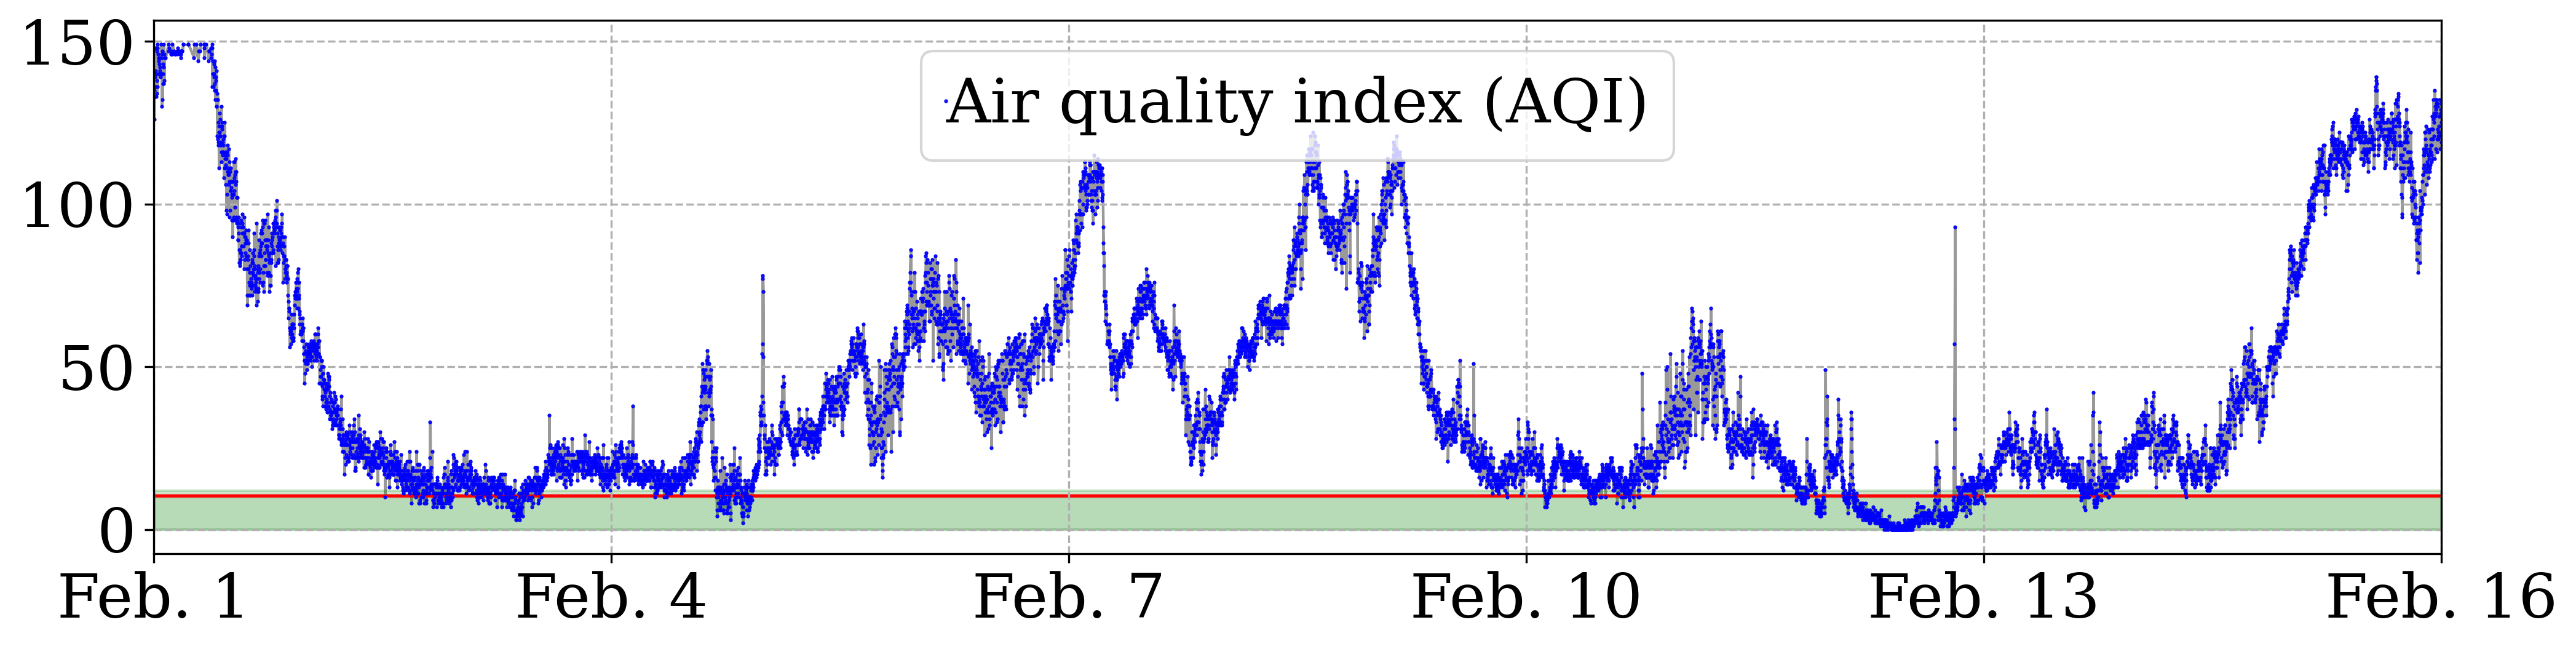

In [16]:
d1=1
d2=15
m=2
dt=6
mon='Feb'
var=2
month_range(d1,d2,m,dt,mon,var)

<Figure size 5100x3000 with 0 Axes>

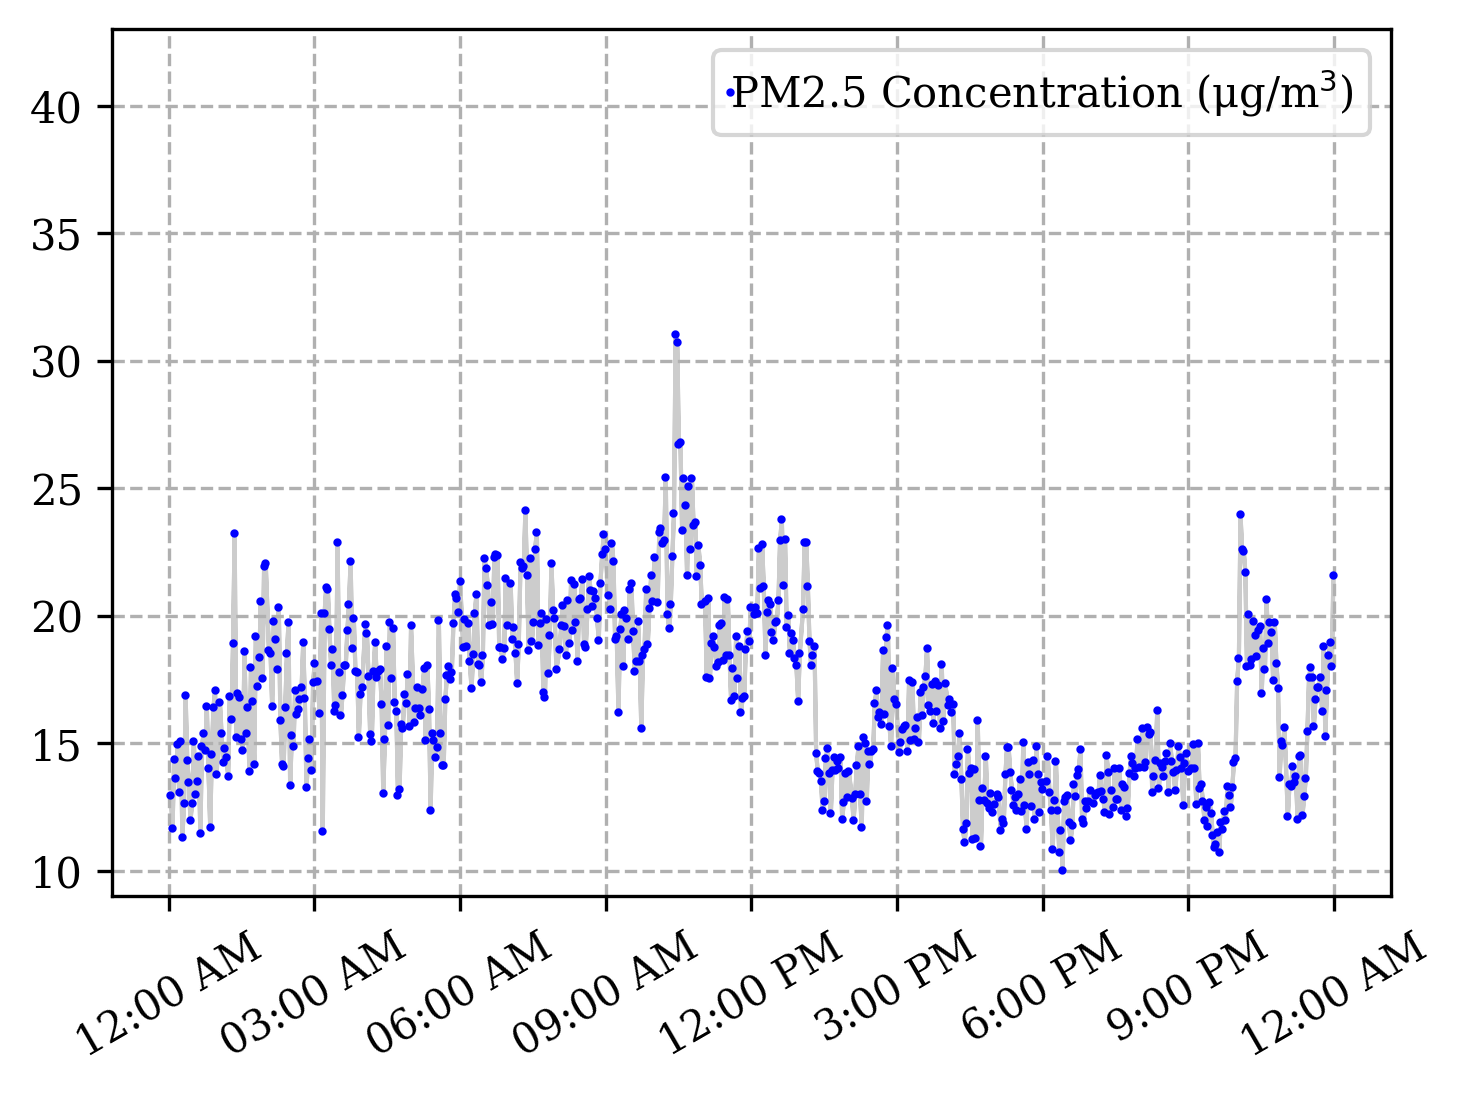

<Figure size 5100x3000 with 0 Axes>

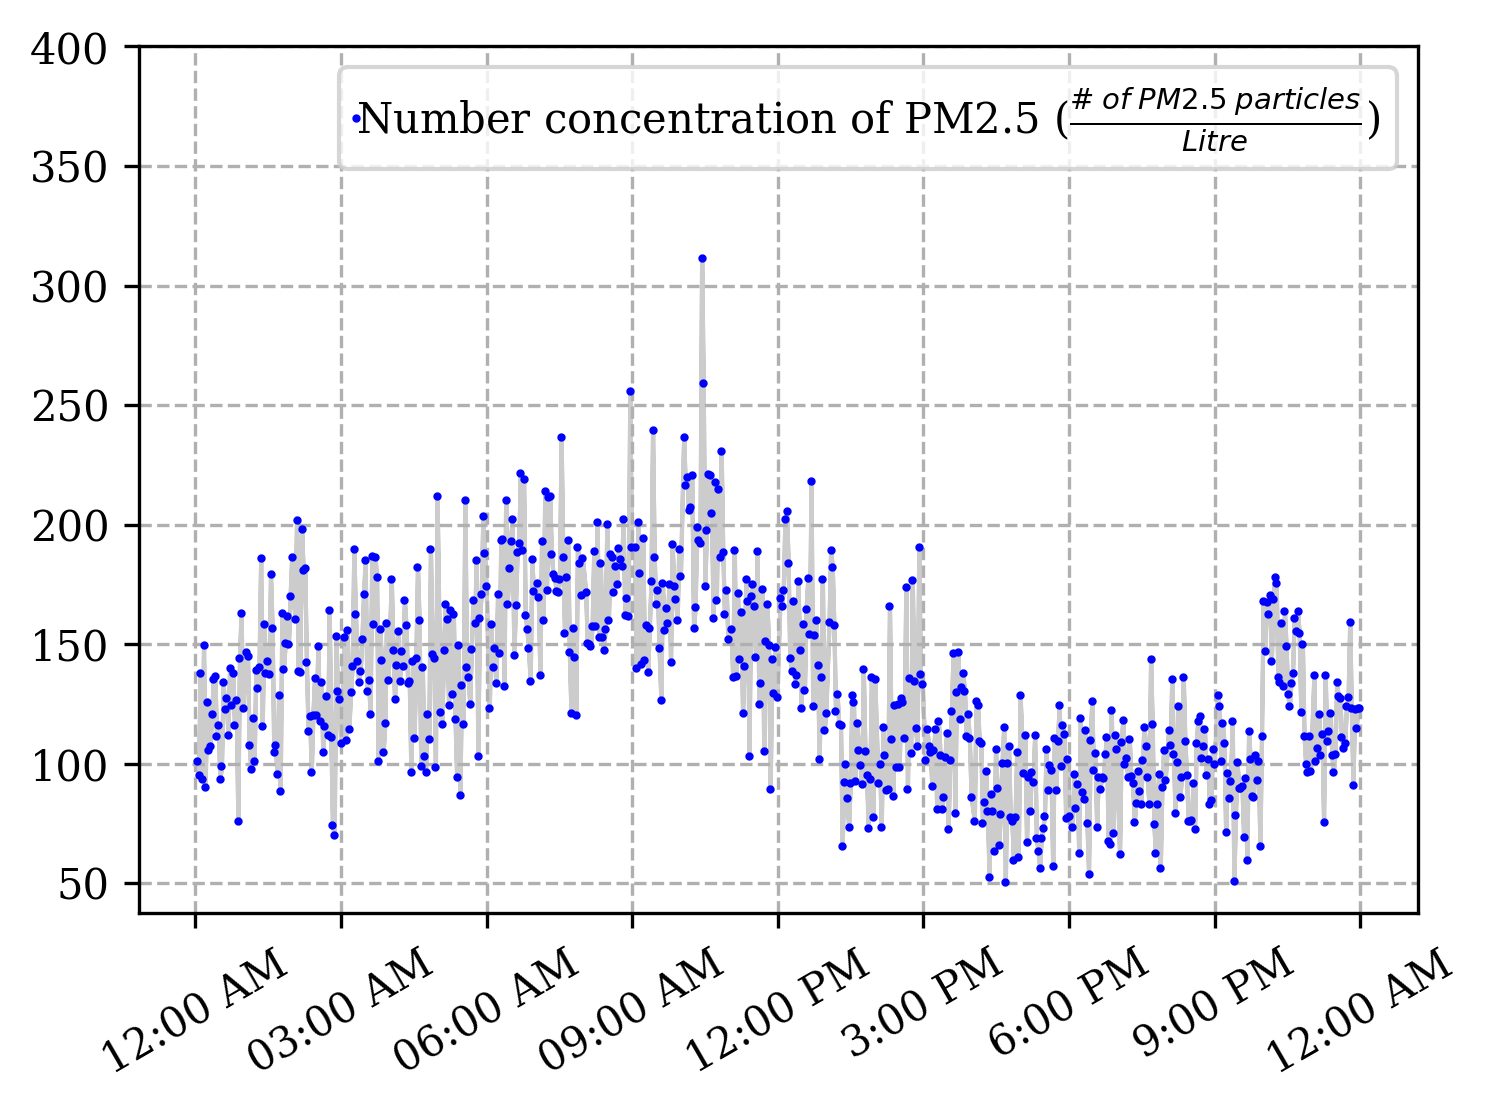

<Figure size 5100x3000 with 0 Axes>

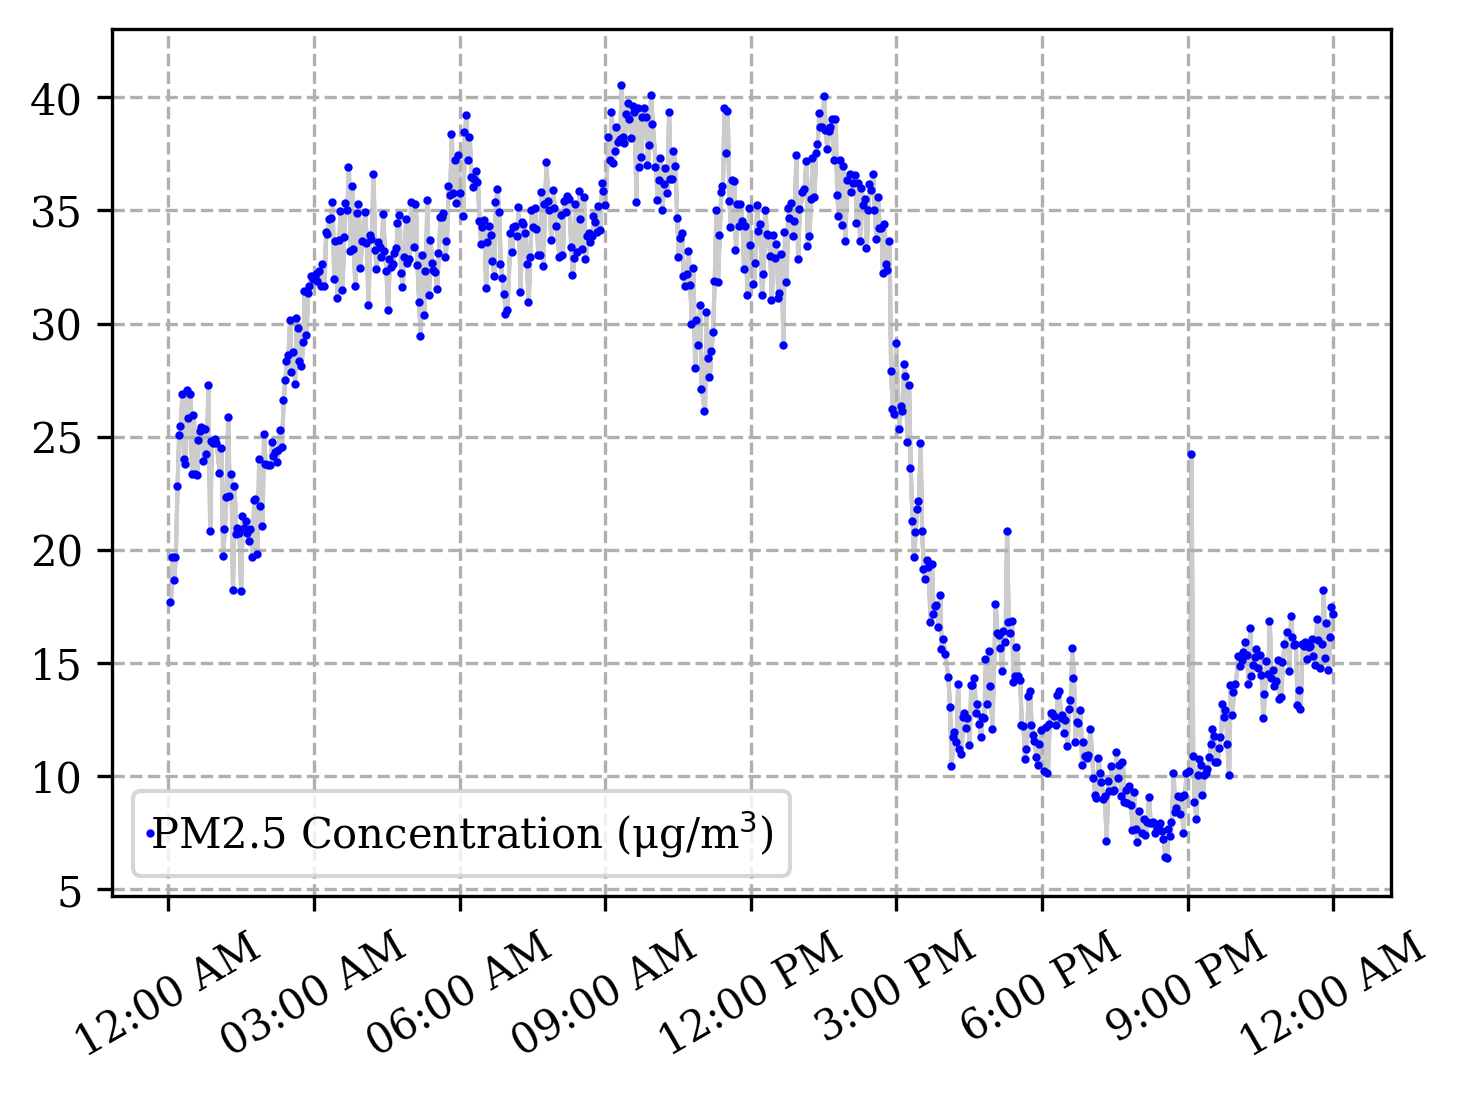

<Figure size 5100x3000 with 0 Axes>

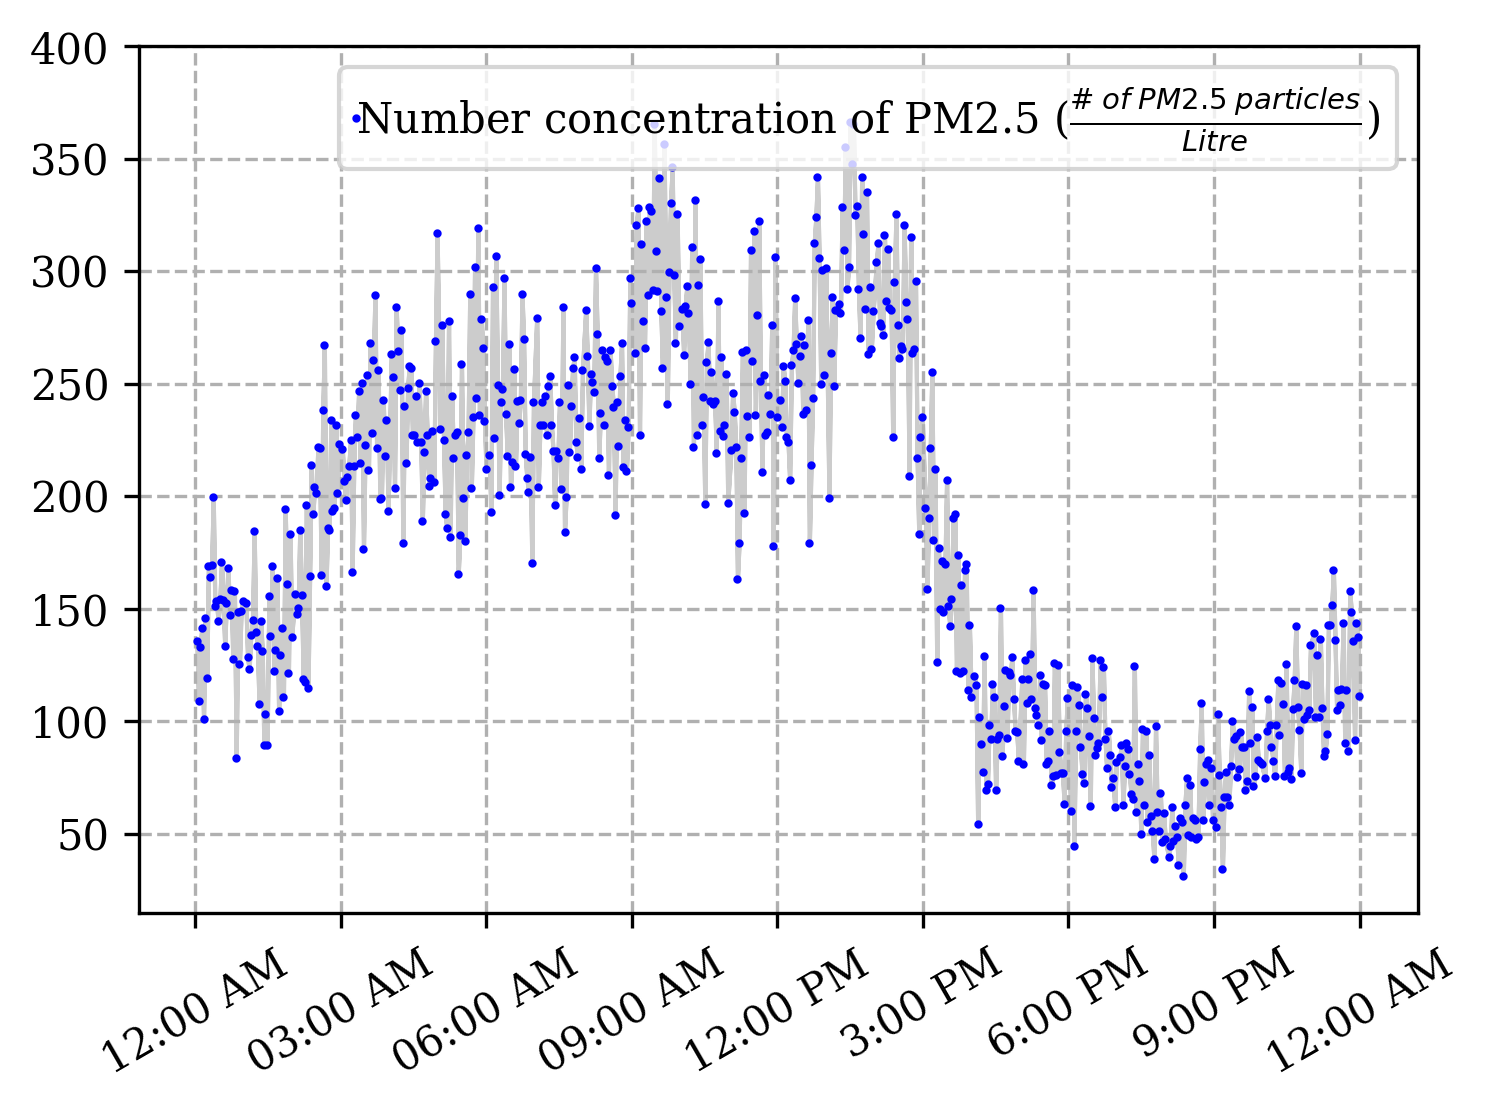

<Figure size 5100x3000 with 0 Axes>

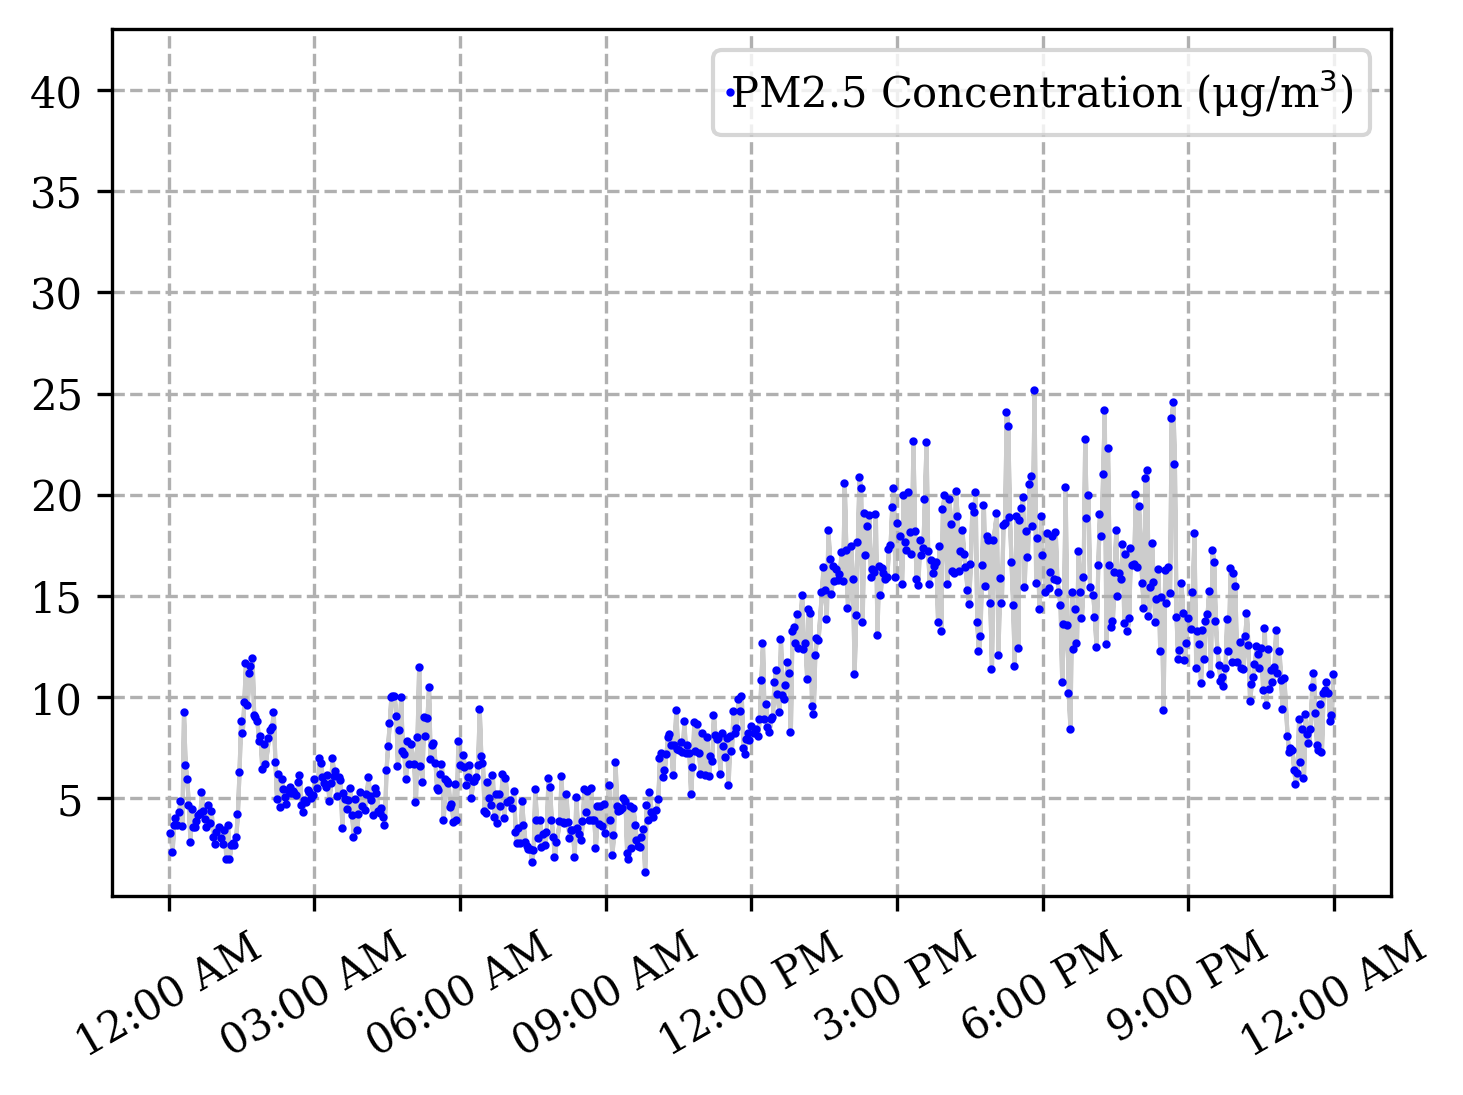

<Figure size 5100x3000 with 0 Axes>

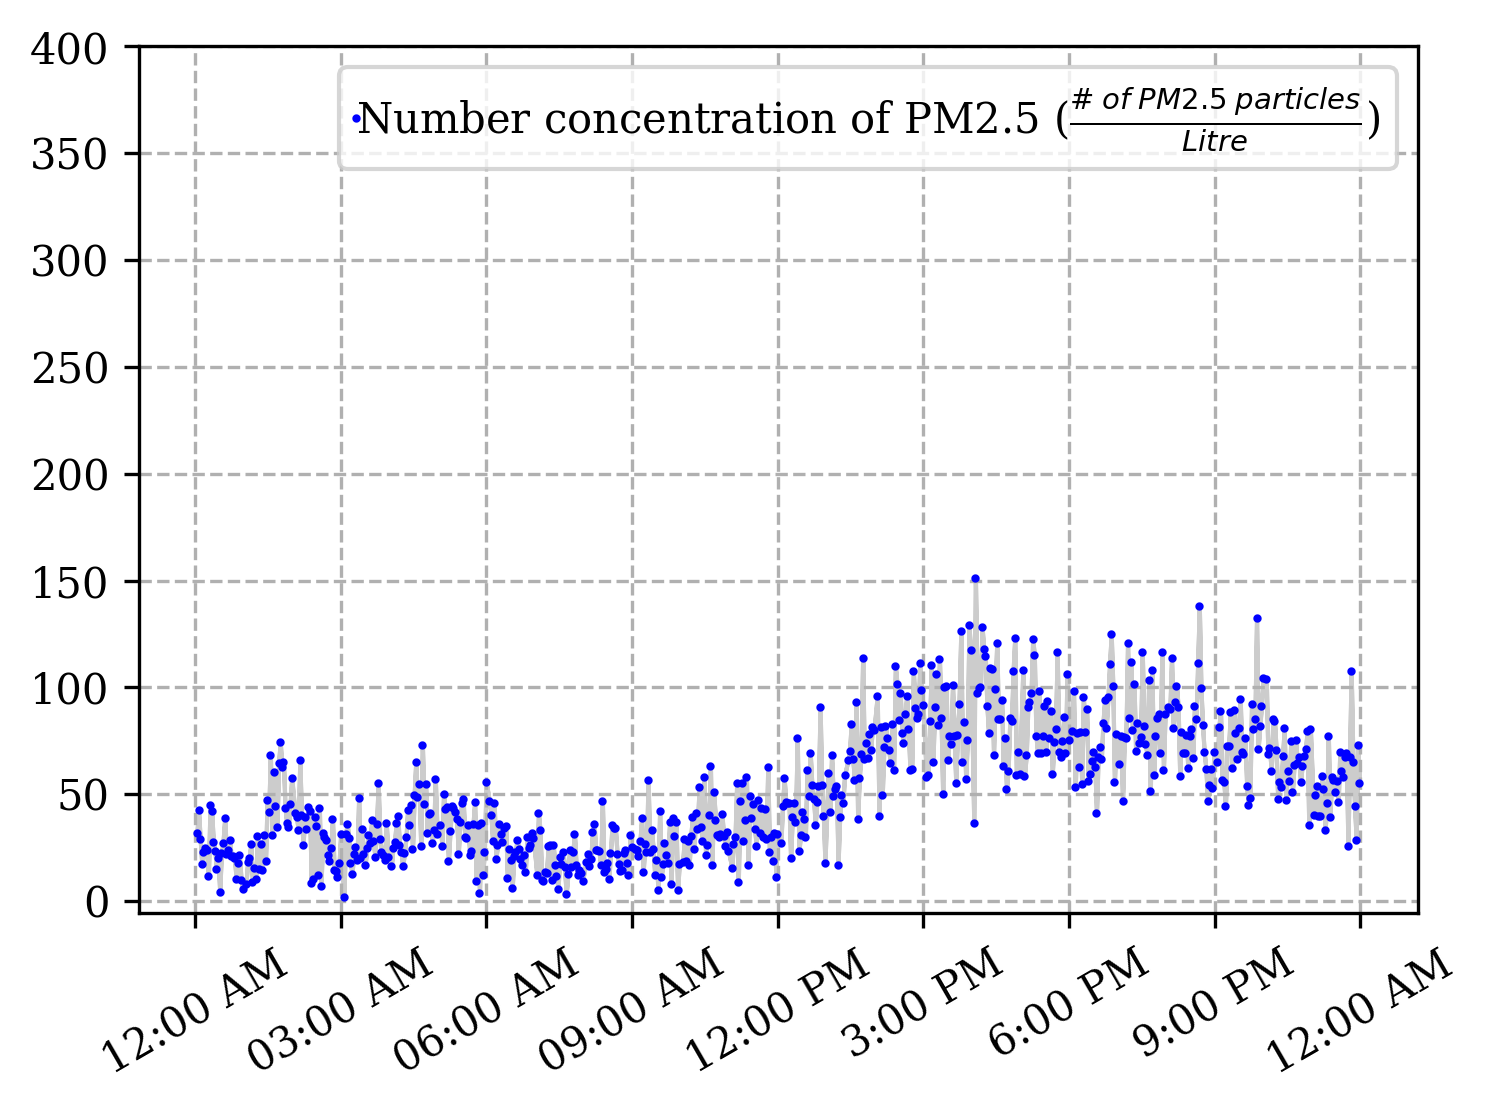

In [17]:
date=[22,25,27]
month=[1,1,1]
dow=['Sun','Wed','Fri']
v=[1,3]
ymax=[43,400]
for d1,m,day in zip(date,month,dow):
    for var,ym in zip(v,ymax) :
        weeklyplots(d1,m,day,var,ym)